In [1]:
!git clone https://github.com/hchocobar/ucu_pad_practice_2023_03.git

Cloning into 'ucu_pad_practice_2023_03'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 11 (delta 0), reused 11 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 803.61 KiB | 8.93 MiB/s, done.


Parte 1

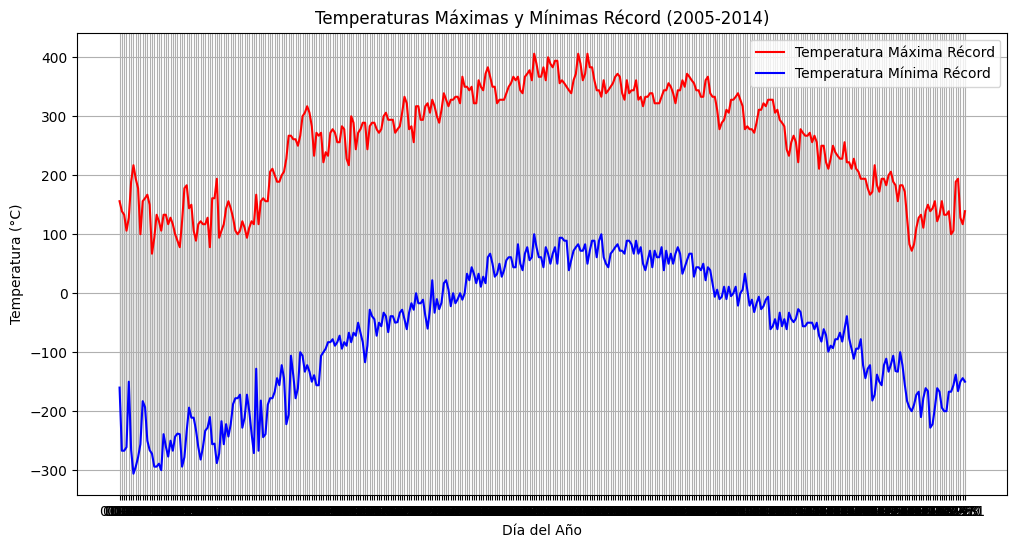

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/ucu_pad_practice_2023_03/data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv"

data = pd.read_csv(file_path)

#columna 'date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

#filtrar los datos para el período 2005-2014
filtered_data = data[(data['Date'].dt.year >= 2005) & (data['Date'].dt.year <= 2014)]

#encontrar los datos 'TMAX' y 'TMIN' en la columna
filtered_data = filtered_data[filtered_data['Element'].isin(['TMAX', 'TMIN'])]

#agrupar los datos por día del año y encontrar las temperaturas máximas y mínimas récord
grouped_data = filtered_data.groupby(filtered_data['Date'].dt.strftime('%m-%d'))['Data_Value'].agg(['max', 'min'])

#crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['max'], label='Temperatura Máxima Récord', color='red')
plt.plot(grouped_data.index, grouped_data['min'], label='Temperatura Mínima Récord', color='blue')
plt.fill_between(grouped_data.index, grouped_data['min'], grouped_data['max'],
                 facecolor='lightgray', alpha=0.5)

plt.xlabel('Día del Año')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Máximas y Mínimas Récord (2005-2014)')
plt.legend()
plt.grid(True)

plt.show()

Parte 2

In [28]:
data_2005_2014 = data[(data['Date'].dt.year >= 2005) & (data['Date'].dt.year <= 2014)]
data_2015 = data[data['Date'].dt.year == 2015]

#encontrar récords máximos y mínimos de 2005-2014
record_max = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby(data_2005_2014['Date'].dt.strftime('%m-%d'))['Data_Value'].max()
record_min = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby(data_2005_2014['Date'].dt.strftime('%m-%d'))['Data_Value'].min()

In [29]:
#funcion para identificar records rotos
record_broken_max = data_2015[(data_2015['Element'] == 'TMAX') & (data_2015['Data_Value'] > record_max[data_2015['Date'].dt.strftime('%m-%d')].values)]
record_broken_min = data_2015[(data_2015['Element'] == 'TMIN') & (data_2015['Data_Value'] < record_min[data_2015['Date'].dt.strftime('%m-%d')].values)]

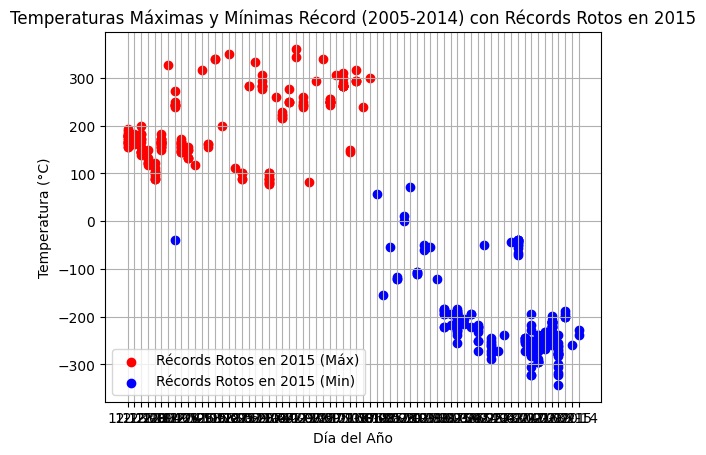

In [30]:
#se superpone la dispersión de puntos en los récords rotos del 2015
plt.scatter(record_broken_max['Date'].dt.strftime('%m-%d'), record_broken_max['Data_Value'], color='red', label='Récords Rotos en 2015 (Máx)')
plt.scatter(record_broken_min['Date'].dt.strftime('%m-%d'), record_broken_min['Data_Value'], color='blue', label='Récords Rotos en 2015 (Min)')

plt.xlabel('Día del Año')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Máximas y Mínimas Récord (2005-2014) con Récords Rotos en 2015')
plt.legend()
plt.grid(True)

plt.show()

Parte 3

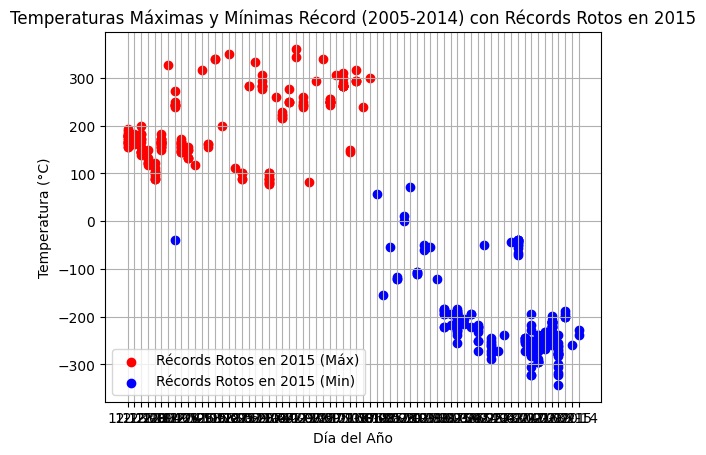

In [36]:
#eliminar los días bisiestos
data = data[~((data['Date'].dt.month == 2) & (data['Date'].dt.day == 29))]

#visualizamos nuevamente sin los dias bisiestos
plt.scatter(record_broken_max['Date'].dt.strftime('%m-%d'), record_broken_max['Data_Value'], color='red', label='Récords Rotos en 2015 (Máx)')
plt.scatter(record_broken_min['Date'].dt.strftime('%m-%d'), record_broken_min['Data_Value'], color='blue', label='Récords Rotos en 2015 (Min)')

plt.xlabel('Día del Año')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Máximas y Mínimas Récord (2005-2014) con Récords Rotos en 2015')
plt.legend()
plt.grid(True)
plt.show()

Parte 4

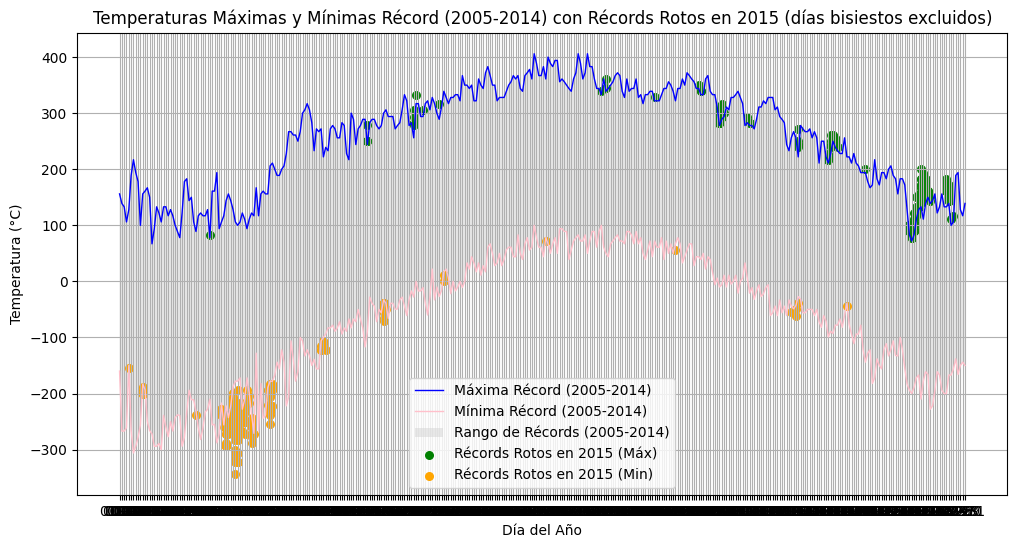

In [47]:
#repito codigo
record_max = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby(data_2005_2014['Date'].dt.strftime('%m-%d'))['Data_Value'].max()
record_min = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby(data_2005_2014['Date'].dt.strftime('%m-%d'))['Data_Value'].min()

plt.figure(figsize=(12, 6))

plt.plot(record_max.index, record_max, label='Máxima Récord (2005-2014)', color='blue', linestyle='-', linewidth=1)
plt.plot(record_min.index, record_min, label='Mínima Récord (2005-2014)', color='pink', linestyle='-', linewidth=1)
plt.fill_between(record_max.index, record_min, record_max, facecolor='lightgray', alpha=0.5, label='Rango de Récords (2005-2014)')

plt.scatter(record_broken_max['Date'].dt.strftime('%m-%d'), record_broken_max['Data_Value'], color='green', label='Récords Rotos en 2015 (Máx)', marker='o', s=30)
plt.scatter(record_broken_min['Date'].dt.strftime('%m-%d'), record_broken_min['Data_Value'], color='orange', label='Récords Rotos en 2015 (Min)', marker='o', s=30)

#crea grafico
plt.xlabel('Día del Año')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Máximas y Mínimas Récord (2005-2014) con Récords Rotos en 2015 (días bisiestos excluidos)')

# Leyenda
plt.legend(loc='best')

# Cuadrícula
plt.grid(True)

plt.show()